In [1]:
%load_ext autoreload
%autoreload 2

# MTBO Kinetics Study

In [2]:
from summit.strategies import STBO, MTBO, Transform, LHS, Chimera
from summit.benchmarks import MIT_case1, MIT_case2
from summit.utils.dataset import DataSet
from summit.domain import *
import summit
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import List
from IPython.display import clear_output

## Pretraining Data

In [3]:
exp_pt = MIT_case1(noise_level=1)
exp_pt.domain

Name,Type,Description,Values
conc_cat,"continuous, input",catalyst concentration,"[0.000835,0.004175]"
t,"continuous, input",reaction time,"[60,600]"
cat_index,"categorical, input",Choice of catalyst,8 levels
temperature,"continuous, input",Reactor temperature in degress celsius,"[30,110]"
y,"continuous, maximize objective",yield (%),"[0,100]"


In [4]:
exp_pt.reset()
lhs = LHS(exp_pt.domain)
conditions = lhs.suggest_experiments(20)
exp_pt.run_experiments(conditions)
pt_data = exp_pt.data
pt_data['task', 'METADATA'] = 0

In [5]:
def make_average_plot(results: List[summit.Runner], ax, label=None, color=None):
    yields = [r.experiment.data['y'] for r in results]
    yields = np.array(yields)
    mean_yield = np.mean(yields, axis=0)
    std_yield = np.std(yields, axis=0)
    x = np.arange(0, len(mean_yield), 1).astype(int)
    ax.plot(x, mean_yield, label=label)
    ax.fill_between(x, mean_yield-std_yield, mean_yield+std_yield, alpha=0.1)

def make_comparison_plot(stbo_results, mtbo_results):
    fig, ax = plt.subplots(1)
    make_average_plot(stbo_results, ax, label="STBO", color='r')
    make_average_plot(mtbo_results, ax, label="MTBO", color='b')
    ax.legend(loc = "lower right")
    ax.set_xlim(0,20)
    ax.set_xticks(np.arange(0, 20, 2).astype(int))
    ax.set_ylabel('Yield')
    ax.set_xlabel('Reactions')
    ax.tick_params(direction='in')
    return fig, ax

## Optimization Case 1-2

In [6]:
N_REPEATS = 10
MAX_ITERATIONS = 20

### Single Task Optimization

In [7]:
def run_stbo(max_iterations=10, categorical_method="one-hot"):
    exp = MIT_case2(noise_level=1)
    exp.reset()
    strategy = STBO(exp.domain, 
                    categorical_method=categorical_method)
    r = summit.Runner(strategy=strategy, 
                      experiment=exp, 
                      max_iterations=max_iterations)
    r.run()
    return r

In [8]:
for i in range(N_REPEATS):
    print(f"Repeat {i}")
    result = run_stbo(MAX_ITERATIONS)
    result.save(f"data/stbo_kinetics_case1-2_noise_repeat_{i}.json")
    clear_output(wait=True)

Repeat 9


### Multitask Optimization

In [9]:
def run_mtbo(max_iterations=10):
    exp = MIT_case2(noise_level=1)
    strategy = MTBO(exp.domain, 
                    pretraining_data=pt_data,
                    categorical_method="one-hot", 
                    task=1)
    r = summit.Runner(strategy=strategy,
                      experiment=exp, 
                      max_iterations=max_iterations)
    r.run()
    return r

In [10]:
for i in range(N_REPEATS):
    print(f"Repeat {i}")
    result = run_mtbo(MAX_ITERATIONS)
    result.save(f"data/mtbo_kinetics_case1-2_noise_repeat_{i}.json")
    clear_output(wait=True)

Repeat 9


### Visualization

Without noise

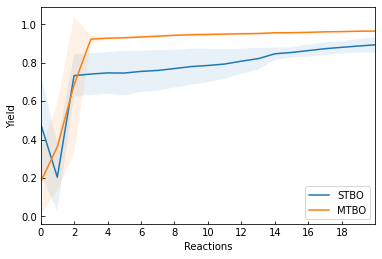

In [7]:
stbo_results = [summit.Runner.load(f"data/stbo_kinetics_repeat_{i}.json") for i in range(10)]
mtbo_results = [summit.Runner.load(f"data/mtbo_kinetics_repeat_{i}.json") for i in range(10)]
def make_average_plot(results: List[summit.Runner], ax, label=None, color=None):
    yields = [r.experiment.data['y'] for r in results]
    yields = np.array(yields)
    mean_yield = np.mean(yields, axis=0)
    std_yield = np.std(yields, axis=0)
    x = np.arange(0, len(mean_yield), 1).astype(int)
    ax.plot(x, mean_yield, label=label)
    ax.fill_between(x, mean_yield-std_yield, mean_yield+std_yield, alpha=0.1)
#     ax.errorbar(x,mean_yield, std_yield, 
#                 label=label, marker='o', capsize=5, c=color, alpha=0)
    
fig, ax = plt.subplots(1)
make_average_plot(stbo_results, ax, label="STBO", color='r')
make_average_plot(mtbo_results, ax, label="MTBO", color='b')
ax.legend(loc = "lower right")
ax.set_xlim(0,20)
ax.set_xticks(np.arange(0, 20, 2).astype(int))
ax.set_ylabel('Yield')
ax.set_xlabel('Reactions')
ax.tick_params(direction='in')
fig.savefig("figures/stbo_mtbo_kinetics_comparison.png")

With noise

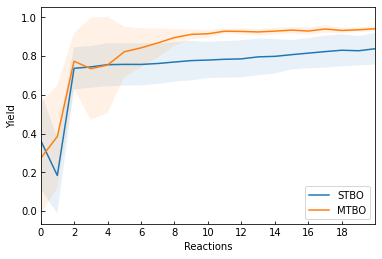

In [12]:
stbo_results = [summit.Runner.load(f"data/stbo_kinetics_case1-2_noise_repeat_{i}.json") for i in range(10)]
mtbo_results = [summit.Runner.load(f"data/mtbo_kinetics_case1-2_noise_repeat_{i}.json") for i in range(10)]
fig, ax = make_comparison_plot(stbo_results, mtbo_results)
fig.savefig("figures/stbo_mtbo_kinetics_case1-2_noise_comparison.png")

* This probably works because the cases are quite similar, the second one just has an extra local optimum

## Optimization Case 1-4

In [10]:
N_REPEATS = 10
MAX_ITERATIONS = 20

### Single Task Optimization

In [11]:
def run_stbo(max_iterations=10, categorical_method="one-hot"):
    exp = MIT_case2(noise_level=1)
    exp.reset()
    strategy = STBO(exp.domain, 
                    categorical_method=categorical_method)
    r = summit.Runner(strategy=strategy, 
                      experiment=exp, 
                      max_iterations=max_iterations)
    r.run()
    return r

In [ ]:
for i in range(N_REPEATS):
    print(f"Repeat {i}")
    result = run_stbo(MAX_ITERATIONS)
    result.save(f"data/stbo_kinetics_case1-2_noise_repeat_{i}.json")
    clear_output(wait=True)

Repeat 2


### Multitask Optimization

In [27]:
def run_mtbo(max_iterations=10):
    exp = MIT_case2(noise_level=1)
    strategy = MTBO(exp.domain, 
                    pretraining_data=pt_data,
                    categorical_method="one-hot", 
                    task=1)
    r = summit.Runner(strategy=strategy,
                      experiment=exp, 
                      max_iterations=max_iterations)
    r.run()
    return r

In [28]:
for i in range(N_REPEATS):
    print(f"Repeat {i}")
    result = run_mtbo(MAX_ITERATIONS)
    result.save(f"data/mtbo_kinetics_repeat_{i}.json")
    clear_output(wait=True)

Repeat 9


### Visualization

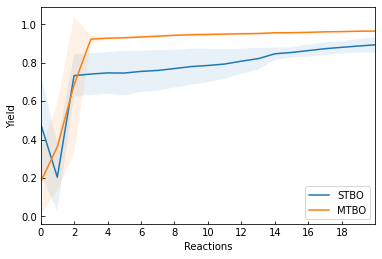

In [7]:
stbo_results = [summit.Runner.load(f"data/stbo_kinetics_repeat_{i}.json") for i in range(10)]
mtbo_results = [summit.Runner.load(f"data/mtbo_kinetics_repeat_{i}.json") for i in range(10)]
def make_average_plot(results: List[summit.Runner], ax, label=None, color=None):
    yields = [r.experiment.data['y'] for r in results]
    yields = np.array(yields)
    mean_yield = np.mean(yields, axis=0)
    std_yield = np.std(yields, axis=0)
    x = np.arange(0, len(mean_yield), 1).astype(int)
    ax.plot(x, mean_yield, label=label)
    ax.fill_between(x, mean_yield-std_yield, mean_yield+std_yield, alpha=0.1)
#     ax.errorbar(x,mean_yield, std_yield, 
#                 label=label, marker='o', capsize=5, c=color, alpha=0)
    
fig, ax = plt.subplots(1)
make_average_plot(stbo_results, ax, label="STBO", color='r')
make_average_plot(mtbo_results, ax, label="MTBO", color='b')
ax.legend(loc = "lower right")
ax.set_xlim(0,20)
ax.set_xticks(np.arange(0, 20, 2).astype(int))
ax.set_ylabel('Yield')
ax.set_xlabel('Reactions')
ax.tick_params(direction='in')
fig.savefig("figures/stbo_mtbo_kinetics_comparison.png")